In [12]:
import matplotlib.pyplot as plt
from math import factorial

In [13]:
def num_combinations(n, k):
    return factorial(n)/(factorial(k) * factorial(n-k))

In [135]:
def num_rule(d):
    num = 0 # number of rules
    for k in range(1, d):
        num += num_combinations(d, k) * sum([num_combinations(d-k, j) for j in range(1, (d-k)+1)])
    return num

In [145]:
from itertools import combinations, permutations
from timeit import timeit
def __get_rules(cluster) -> list:
    rules = []
    for set_size in range(1, len(cluster)):
        rules.extend(list(combinations(cluster, set_size)))

    rules = list(combinations(rules, 2))

    # Prune where elements are in both antecedent and consequent
    pruned_rules = []
    for rule in rules:
        a, b = rule
        if any(p in b for p in a):
            continue
        pruned_rules.append((a,b))
        pruned_rules.append((b,a))

        
    return pruned_rules

data = [1,2,3]
res = __get_rules(data)

expected = num_rule(len(data))
actual = len(res)

print(f'Expected {expected}, got {actual}')

print('----------------')
res.sort(key=lambda x: len(x[0]) + len(x[1]))

Expected 12.0, got 12
----------------


In [142]:
n = 2
print(f'{num_rule(n):,}')

2.0


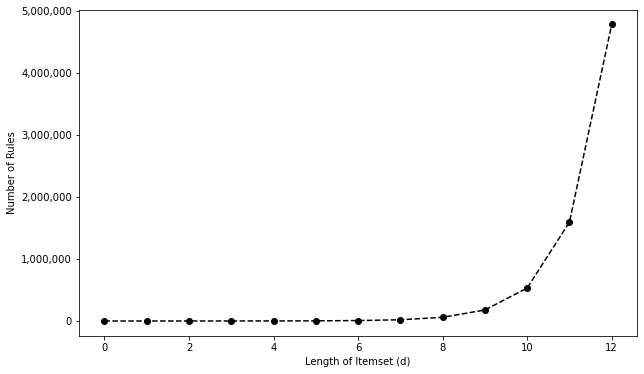

In [52]:
values = [num_rule(n) for n in range(2, 15)]
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(values, '--o', color='k')
ax.set_xlabel("Length of Itemset (d)")
ax.set_ylabel("Number of Rules")
ax.set_yticklabels([f'{int(y):,}' for y in ax.get_yticks().tolist()])
plt.savefig('../images/numrules.png')